# Sampling

In almost every field of study (natural sciences, politics, computer science), we often need statistics about our data. But more often than not, it is simply too impractical to gain all possible information to arrive at our summary and conclusions. For example, if we wanted to predict election results, it would be impractical to gather preference data from every eligible voter in the country. 

In such cases, we have to resort to cheaper methods that are more feasible. One such method is to gather data of a small fraction of the population that you believe represents the entire population well. The statistics gathered from this fraction of people would then be reflective of the population as a whole. This is called sampling.

The Credit Card Fraud Detection dataset has been obtained from Kaggle courtesy Andrea and is available at https://www.kaggle.com/dalpozz/creditcardfraud.

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

## Estimating a Population Proportion

In the following sections, we are going to try and find the fraction of transactions that are fraudalent by examining data from only 5% of the sample. 

In [4]:
df_samp = df.sample(frac=0.05)

In [5]:
df_samp['Class'].value_counts()

0    14216
1       24
Name: Class, dtype: int64

In [6]:
p_hat = len(df_samp[df_samp['Class'] == 1]) / len(df_samp)
p_hat

0.0016853932584269663

The value of p_hat obtained above is the fraction of fraudalent transactions in the random sample that Pandas gave us. But how is this p_hat value related to the real fraction p?

Imagine that we didn't have the data for all the credit card transactions as we do now. How would we go about estimating the real fraction from the results of this small sample? As you may have guessed, it really isn't possible to determine the exact fraction with 100% accuracy. What we can do, though, is define a confidence interval and quantitatively state that we are this much confident that the real fraction is within a particular range. In doing so, we shift from a deterministic realm to the stochastic realm of samples governed by probabilities.

The p_hat that we obtained in a previous step is a random variable whose value will change in different trials of the experiment (sampling 5% of the population).
Let's say that we conduct this experiment 1000 times. How will the p_hat obtained in each experiment be related to each other? Let's simulate the experiment, plot the distribution and find out.

In [7]:
p_hat_samples = []
for i in range(1000):
    sample = df.sample(frac=0.05)
    p_sample = len(sample[sample['Class'] == 1]) / len(sample)
    p_hat_samples.append(p_sample)
    

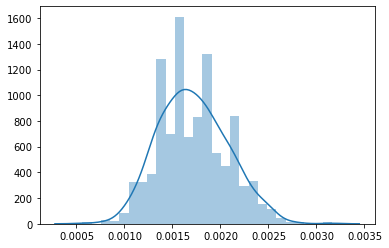

In [8]:
sns.distplot(p_hat_samples)

As can be seen above, the $\hat{p}$'s are in the form of a normal distribution.  Without proof, we will present the following results:

* E[$\hat{p}$] = p.
* $\hat{\sigma}$ = $\sqrt{\frac{p(1-p)}{n}}$
* The distribution becomes normal with p as the mean as n approaches infinity.

Therefore, the accuracy of our value is only dependent on the spread of our $\hat{p}$. Since p is deterministic, we can say that it is dependent only on the sample size, n. The accuracy of our estimates is therefore determined by $\frac{1}{\sqrt{n}}$

## Reporting our results

The sample size determines the accuracy of our results. As mentioned earlier, we can never be 100% accurate with our results. We can only be confident to a certain level. From our previous notebook, we learnt about z-scores and p-values. We know that 68% of the values fall within one standard deviation.

From this, we can directly say that the real value p falls within $\hat{p}$ + $\hat{\sigma}$ and $\hat{p}$ - $\hat{\sigma}$ and we can state this with 68% certainty.

But what if we wanted a 99% certainty (or confidence level)?

In [9]:
def zscore(frac):
    return stats.norm.ppf(0.5 + frac/2)

In [10]:
z = zscore(0.99)
z

2.5758293035489004

The above result tells us that 99% of the values fall within 2.575 standard deviations.

In [11]:
p_hat

0.0016853932584269663

In [12]:
sigma_hat = np.sqrt((p_hat * (1- p_hat))/len(df_samp))
sigma_hat

0.00034373942353406597

In [13]:
lower_limit = p_hat - z*sigma_hat
upper_limit = p_hat + z*sigma_hat
lower_limit, upper_limit

(0.0007999791785029127, 0.00257080733835102)

From the above result, we can directly state that we are 99% confident that the real p lies within (0.0004970920590188173, 0.002030997828621632).

We can now present the following results:
* There is a tradeoff between confidence level and range size. Higher the confidence, larger the range.
* Increasing the sample size will lead to a reduced standard deviation and therefore, more accurate and practically significant results.

Finally let us check if our results tally with what we've suggested.

In [14]:
p = len(df[df['Class'] == 1])/len(df)
p

0.001727485630620034

The value of p does indeed fall between the above range.

Finally, let us check on the mean of the $\hat{p}$'s we obtained from simulating the experiment a 1000 times. From our results, we know that this mean will approach p as n approaches infinity. Therefore, we should be reasonably confident that this mean is extremely close to the value of p.

In [15]:
expected_p = pd.Series(p_hat_samples).mean()
expected_p

0.0017156601123595428

We see that this is indeed the case.

## Estimating the average weight of Women Olympians

In the following sections, we will try and estimate the mean of the weights of female olympic athletes by taking a fraction of the data (artificially creating a sample). Estimation of the population mean is extremely similar to estimating the population proportion as is demonstrated below.

In [16]:
df2 = pd.read_csv('data/athletes.csv')
df2.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [17]:
df2 = df2[df2['sex'] == 'female']
df2.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0


In [18]:
df2.shape

(5205, 11)

In [19]:
df2_samp = df2.sample(frac=0.1)
df2_samp.shape

(520, 11)

In [20]:
mean_hat = df2_samp['weight'].mean()
mean_hat

62.12625250501002

Unlike the previous case, we are not dealing fractions but means. How will the $\hat{\mu}$'s be distributed? Turns out, they will be normally distributed as well! This famous result is known as the **Central Limit Theorem**. 

What is brilliant about this result is its complete lack of regard for the distribution of the original data. It doesn't matter how the data is related to one another; their sampled means will always be normally distributed. Like in the proportions case, let us simulate an experiment to visualise this result.

In [21]:
mean_hat_samples = []
for i in range(1000):
    sample = df2.sample(frac=0.1)
    mean_sample = sample['weight'].mean()
    mean_hat_samples.append(mean_sample)
    

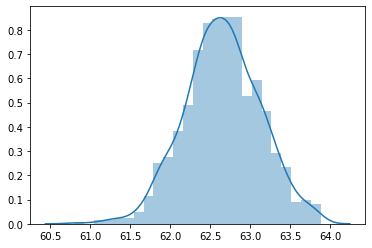

In [22]:
sns.distplot(mean_hat_samples)

The sampled means are indeed normally distributed as can be seen above. Let us now continue with our analysis of estimating the population mean.

In [23]:
std_hat = df2_samp['weight'].std()/np.sqrt(len(df2_samp))
std_hat

0.5063431674251337

For a change, let us calculate the confidence interval at a 95% confidence level this time.

In [24]:
z = zscore(0.95)
z

1.959963984540054

In [25]:
lower_limit = mean_hat - z*std_hat
upper_limit = mean_hat + z*std_hat

lower_limit, upper_limit

(61.13383813303883, 63.118666876981216)

We can now report that we are 95% confident that the average weight of female Olympians is within the above range

Let us check our result with the actual mean.

In [26]:
df2['weight'].mean()

62.64442668797443

62.6444 does indeed fall between the above range. A general point to be noted is that the greater the confidence level, the greater the probability that the real value is in the range offered.

## The T-Statistic

The t-statistic is the ideal score to use for sample sizes lesser than 30. For sample sizes greater than 30, t and z scores are essentially the same.

In [27]:
def tscore(frac, freedom):
    return stats.t.ppf(0.5 + frac/2, freedom)

In [28]:
t = tscore(0.95, len(df_samp) - 1)
t

1.9601306022425609

In [29]:
z

1.959963984540054

As can be seen above, for sample sizes greater than 30 (as it is in this case), t and z are almost equal in value.

## Central Limit Theorem Test on Non Normal Distributions

Let us check the merit of the central limit theorem by testing it on a non normal distribution.

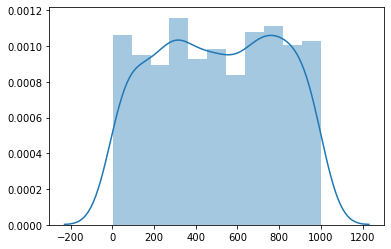

In [30]:
non_normal = pd.Series(np.random.randint(1000, size=1000))
sns.distplot(non_normal)

This is clearly not normal. Now, let us try to simulate our little experiment on this distribution.

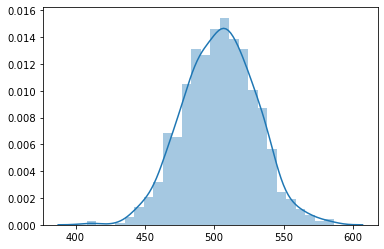

In [31]:
sns.distplot([non_normal.sample(frac=0.1).mean()  for i in range(1000)])